In [1]:
#encoding=utf-8
import jieba


seg_list = jieba.cut("大巨蛋案對市府同仁下封口令？　柯P否認", cut_all=True)
print "Full Mode:", "/ ".join(seg_list) 


seg_list = jieba.cut("大巨蛋案對市府同仁下封口令？　柯P否認", cut_all=False)
print "Default Mode:", "/ ".join(seg_list) 


Building prefix dict from C:\Python27\lib\site-packages\jieba\dict.txt ...
DEBUG:jieba:Building prefix dict from C:\Python27\lib\site-packages\jieba\dict.txt ...
Dumping model to file cache c:\users\user\appdata\local\temp\jieba.cache
DEBUG:jieba:Dumping model to file cache c:\users\user\appdata\local\temp\jieba.cache
Loading model cost 3.130 seconds.
DEBUG:jieba:Loading model cost 3.130 seconds.
Prefix dict has been built succesfully.
DEBUG:jieba:Prefix dict has been built succesfully.


Full Mode: 大/ 巨蛋/ 案/ 對/ 市府/ 同仁/ 下/ 封口/ 封口令/ 口令/ / / / 柯/ P/ 否/ 認
Default Mode: 大/ 巨蛋/ 案對/ 市府/ 同仁/ 下/ 封口令/ ？/ 　/ 柯/ P/ 否認


In [2]:
import jieba.posseg as pseg
words = pseg.cut("大巨蛋案對市府同仁下封口令？　柯P否認")
for w in words:
    print w.word, w.flag


大 a
巨蛋 n
案 ng
對 p
市府 n
同仁 nr
下 f
封口令 n
？ x
　x
柯 nr
P eng
否認 v


In [3]:
jieba.add_word('柯P',100, 'nr')
jieba.add_word('大巨蛋',100, 'ns')

In [4]:
sentence = "大巨蛋案對市府同仁下封口令？　柯P否認"
words = jieba.cut(sentence, cut_all=False)
print "/ ".join(words) 

大巨蛋/ 案對/ 市府/ 同仁/ 下/ 封口令/ ？/ 　/ 柯P/ 否認


In [5]:
words = jieba.tokenize(unicode(sentence, 'utf-8'))

for tw in words:
    print tw[0], tw[1], tw[2]

大巨蛋 0 3
案對 3 5
市府 5 7
同仁 7 9
下 9 10
封口令 10 13
？ 13 14
　14 15
柯P 15 17
否認 17 19


In [6]:
import jieba.analyse
tags = jieba.analyse.extract_tags(sentence, 1)
print ",".join(tags)
tags = jieba.analyse.extract_tags(sentence, 1, allowPOS = ['nr'])
print ",".join(tags)


封口令
柯P


In [7]:
import jieba.analyse
sentence = "根據歐洲電商組織(Ecommerce Europe) 最新消息得知，\
該集團積極讓歐洲的包裹遞送服務與電商領域有更緊密結合。如此一來，\
便可解決電商物流的障礙。此組織總共結合歐洲 16 國的電商協會，\
目標整合歐洲的包裹物流市場，讓商品跨境更為順暢"
tags = jieba.analyse.extract_tags(sentence)
print '/'.join(tags)


歐洲/電商/組織/包裹/物流/一來/領域/遞送/緊密/Europe/市場/順暢/根據/決電商/服務/集團/總共結合/障礙/積極/目標


In [1]:
import sqlite3
db = sqlite3.connect('news.sqlite') 
cur = db.cursor()
cur.execute('select * from news_entry')
allNews = cur.fetchall()
newsary = [] 
for rec in allNews:
    newsary.append(rec[5])
cur.close()
db.close()


In [2]:
print newsary[0]

吳映潔（鬼鬼）今天出席中視中天新劇《少年四大名捕》見面會，被問到前緋聞男友胡宇威摔車斷勒骨住院一事，她委婉地說，「只有簡訊問候」，問怎沒去探病？她說：「很怪吧！」（葉婉如/台北報導）


In [4]:
import jieba
worddic = {}
for news in newsary:
    for wd in jieba.cut(news):
        if wd not in worddic:
            worddic[wd] = 1
        else:
            worddic[wd] = worddic[wd] + 1

Building prefix dict from C:\Python27\lib\site-packages\jieba\dict.txt ...
DEBUG:jieba:Building prefix dict from C:\Python27\lib\site-packages\jieba\dict.txt ...
Loading model from cache c:\users\user\appdata\local\temp\jieba.cache
DEBUG:jieba:Loading model from cache c:\users\user\appdata\local\temp\jieba.cache
Loading model cost 0.538 seconds.
DEBUG:jieba:Loading model cost 0.538 seconds.
Prefix dict has been built succesfully.
DEBUG:jieba:Prefix dict has been built succesfully.


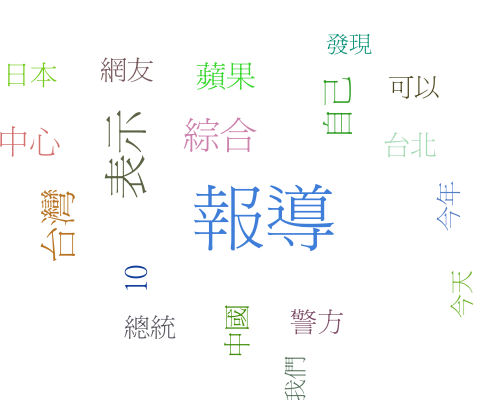

In [8]:
from pytagcloud import create_tag_image, make_tags
from IPython.display import Image
from operator import itemgetter
swd = sorted(worddic.iteritems(), key=itemgetter(1), reverse=True)
swd = [w for w in swd[0:100] if len(w[0]) >= 2 and w != '']

tags = make_tags(swd, maxsize=60)
create_tag_image(tags, 'wc.png', size=(600,400), fontname='SimHei')
Image(filename='wc.png') 


In [9]:
import jieba
import jieba.analyse

worddic = {}
for news in newsary:
    for wd in jieba.analyse.extract_tags(news):
        if wd not in worddic:
            worddic[wd] = 1
        else:
            worddic[wd] = worddic[wd] + 1

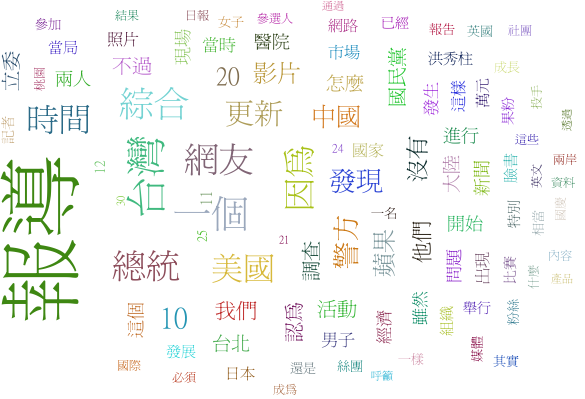

In [11]:
from pytagcloud import create_tag_image, make_tags
from IPython.display import Image
from operator import itemgetter
swd = sorted(worddic.iteritems(), key=itemgetter(1), reverse=True)
swd = [w for w in swd[0:100] if len(w[0]) >= 2 and w != '']

tags = make_tags(swd, maxsize=80)
create_tag_image(tags, 'wc.png', size=(600,400), fontname='SimHei')
Image(filename='wc.png') 
